In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display,Math
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['text.usetex'] = True

# Laplaces Equation : $\nabla^2 \phi=0$
 
 In 2D,  $\nabla^2 \phi(x,y)= \frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2} $
 
 From the 2nd ordered central difference method
 
 $\quad\begin{align}\frac{\partial^2\phi}{\partial x^2} \approx \frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{\Delta x^2} \quad \frac{\partial^2\phi}{\partial y^2} \approx \frac{\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}}{\Delta y^2} \end{align}$
  
 since $\Delta x =\Delta y = h$(let's say)
 
 Now on solving 
 
  $\begin{align} &{\therefore} \ \nabla^2 \phi(x,y)=0 \\ &{or,} \ \frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}=0 \\ &{or,} \ \frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{h^2}+\frac{\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}}{h^2}=0 \\ &{or,} \ \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j} }{h^2}=0 \\ &{or,} \ \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} = 4\phi_{i,j} \\ &{or,} \ \phi_{i,j} = \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1}}{4} \end{align}$

In [2]:
N = 64
M = 64
V = 1
y  = np.zeros([N+2,M+2])
y[ 0 ,  :  ] = V                    # Boundary condition at the top
#y[N+1,  : ] = 0                    # Boundary condition at the bottom
#y[ : ,  0 ] = 0                    # Boundary condition at the left
#y[ : , M+1] = 0                    # Boundary condition at the right

yp = y.copy()
eps = 1e-6
error = 1
error_array = [1]
y_init = y

### Jacobi Method : 

$\displaystyle{\phi_{i,j}= \frac{1}{4} [\phi_{i-1,j}+\phi_{i+1,j}+\phi_{i,j-1}+\phi_{i,j+1}]}$

In [3]:
t0 = datetime.now()
y  = np.zeros([N+2,M+2])
y[0,:]=V
error = 1
error_array = []
while (error > eps):
        yp[1:N+1,1:M+1] = y[0:N,1:M+1] +y[2:N+2,1:M+1] + y[1:N+1,0:M] +y[1:N+1,2:M+2]
        yp[1:N+1,1:M+1] /= 4

        error = np.max(np.absolute(yp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
#       print(error)
        y = yp.copy()
        error_array.append(error)

t1 = datetime.now()
T_J = t1-t0
err1 = np.array(error_array)
y_J = y

### Gauss-Siedel Method

$\displaystyle{\phi_{i,j}\leftarrow \frac{1}{4} [\phi_{i-1,j}+\phi_{i+1,j}+\phi_{i,j-1}+\phi_{i,j+1}]}$

In [4]:
t0 = datetime.now()
y  = np.zeros([N+2,M+2])
y[0,:]=V
error = 1
error_array = []
while (error > eps):
    yp = y.copy()  # prev step
    for i in range(1,N+1):
        for j in range(1,M+1):
            y[i,j] = (y[i-1,j] +y[i+1,j] + y[i,j-1] +y[i,j+1])/4

    error = np.max(np.absolute(yp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
#   print(error)
    error_array.append(error)

t1 = datetime.now()
T_GS = t1-t0
err2 = np.array(error_array)
y_GS = y

### Red-Black Method

$\displaystyle{\phi_{i,j}\leftarrow \frac{1}{4} [\phi_{i-1,j}+\phi_{i+1,j}+\phi_{i,j-1}+\phi_{i,j+1}]}$

In [5]:
t0 = datetime.now()
y  = np.zeros([N+2,M+2])
y[0,:]=V
error = 1
error_array = []
while (error > eps):
    tmp  = y.copy()  # copy of y
    y[1:N:2,1:M:2] = (y[0:N-1:2,1:M:2] +y[2:N+1:2,1:M:2] \
                                         + y[1:N:2,0:M-1:2] +y[1:N:2,2:M+1:2])/4
    y[2:N+1:2,2:M+1:2] = (y[1:N:2,2:M+1:2] +y[3:N+2:2,2:M+1:2] \
                                             + y[2:N+1:2,1:M:2] +y[2:N+1:2,3:M+2:2])/4
    y[1:N:2,2:M+1:2] = (y[0:N-1:2,2:M+1:2] + y[2:N+1:2,2:M+1:2] \
                                                + y[1:N:2,1:M:2] + y[1:N:2,3:M+2:2])/4
    y[2:N+1:2,1:M:2] = (y[1:N:2,1:M:2] +y[3:N+2:2,1:M:2] \
                                             + y[2:N+1:2,0:M-1:2] +y[2:N+1:2,2:M+1:2])/4
    error = np.max(np.absolute(tmp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
    # print(error)
    error_array.append(error)
t1 = datetime.now()
T_RB = t1-t0
err3 = np.array(error_array)
y_RB = y

### Gauss-Siedel-SOR Method

$\displaystyle{\phi_{i,j}\leftarrow \frac{\omega}{4} [\phi_{i-1,j}+\phi_{i+1,j}+\phi_{i,j-1}+\phi_{i,j+1}] + (1-\omega)\phi_{i,j}}$

In [6]:
t0 = datetime.now()
y  = np.zeros([N+2,M+2])
y[0,:]=V
error = 1
error_array = []
sor = 1.5
while (error > eps):
    yp = y.copy()  # prev step
    for i in range(1,N+1):
        for j in range(1,M+1):
            y[i,j] = sor*(y[i-1,j] +y[i+1,j] + y[i,j-1] +y[i,j+1])/4 + (1-sor)*y[i, j]
    error = np.max(np.absolute(yp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
    #print(error)
    error_array.append(error)
t1 = datetime.now()
T_GSOR = t1-t0
err4 = np.array(error_array)
y_GSSOR = y

### Red-Black-SOR Method

In [7]:
t0 = datetime.now()
y  = np.zeros([N+2,M+2])
y[0,:]=V
error = 1
error_array = []
sor = 1.5
while (error > eps):
    tmp  = y.copy()  # copy of y
    y[1:N:2,1:M:2] = sor*(y[0:N-1:2,1:M:2]+y[2:N+1:2,1:M:2]+y[1:N:2,0:M-1:2]+y[1:N:2,2:M+1:2])/4 + (1-sor)*y[1:N:2,1:M:2]
    y[2:N+1:2,2:M+1:2] = sor*(y[1:N:2,2:M+1:2] + y[3:N+2:2,2:M+1:2] + y[2:N+1:2,1:M:2] \
                                               + y[2:N+1:2,3:M+2:2])/4 + (1-sor)*y[2:N+1:2,2:M+1:2]
    y[1:N:2,2:M+1:2] = sor*(y[0:N-1:2,2:M+1:2] + y[2:N+1:2,2:M+1:2] + y[1:N:2,1:M:2] + y[1:N:2,3:M+2:2])/4 \
                                               + (1-sor)*y[1:N:2,2:M+1:2]
    y[2:N+1:2,1:M:2] = sor*(y[1:N:2,1:M:2] + y[3:N+2:2,1:M:2] + y[2:N+1:2,0:M-1:2] + y[2:N+1:2,2:M+1:2])/4 \
                                           + (1-sor)*y[2:N+1:2,1:M:2]
    error = np.max(np.absolute(tmp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
    #print(error)
    error_array.append(error)
t1 = datetime.now()
T_RBSOR = t1-t0
err5 = np.array(error_array)
y_RBSOR = y

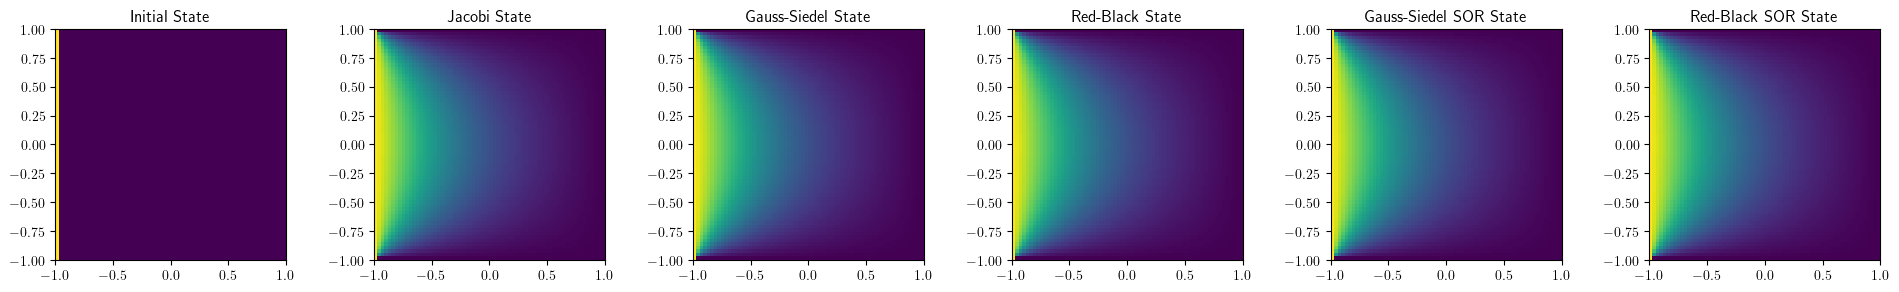

In [8]:
Y = [y_init, y_J, y_GS, y_RB, y_GSSOR, y_RBSOR]
ty = ['Initial','Jacobi', 'Gauss-Siedel', 'Red-Black', 'Gauss-Siedel SOR', 'Red-Black SOR']

fig, ax = plt.subplots(1, len(Y), figsize = (24,3))
for i, y in enumerate(Y):
    c = ax[i].imshow(y.transpose(), vmin=abs(y).min(), vmax=abs(y).max(), extent=[-1,1,-1,1])
    ax[i].set_aspect(aspect=1)
    divider = make_axes_locatable(ax[i])
    ax[i].set_title(ty[i]+' State')

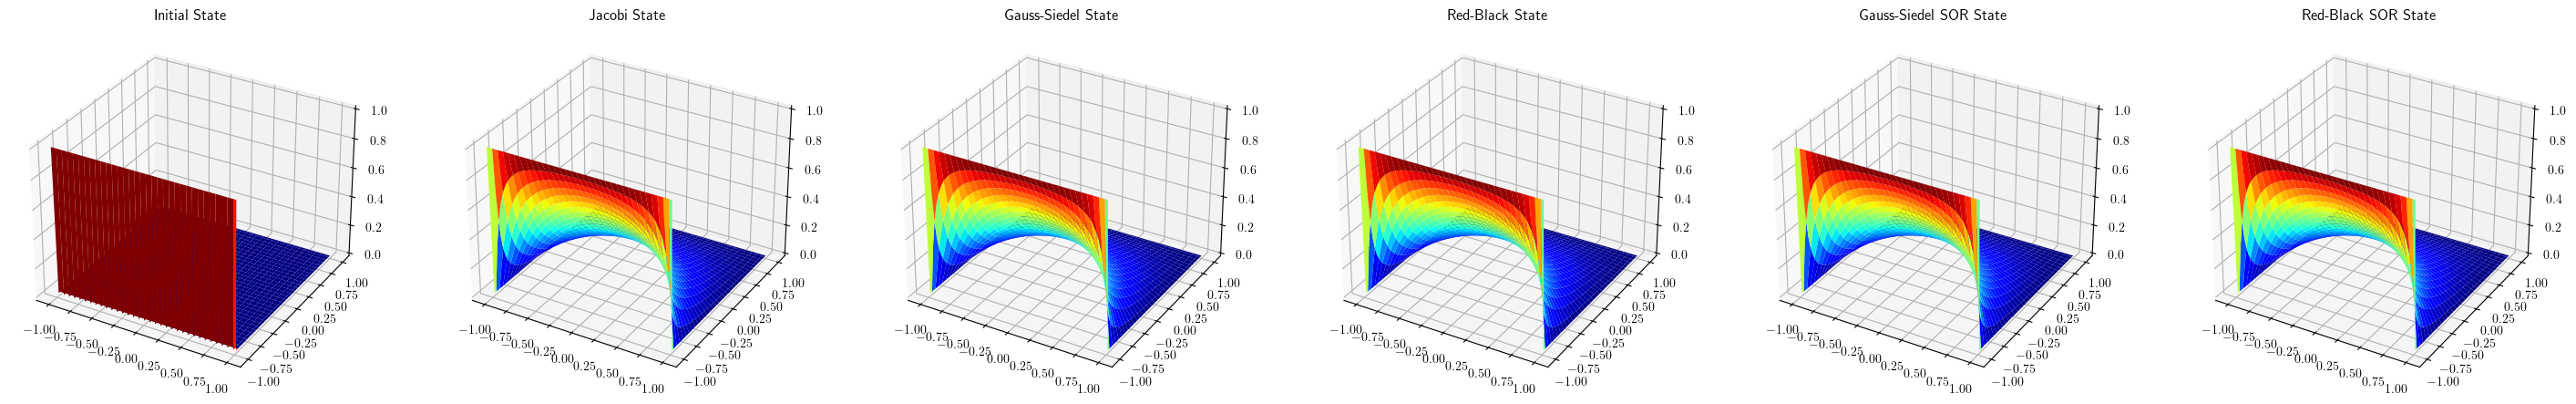

In [9]:
xc = np.linspace(-1,1,N+2)
yc = np.linspace(-1,1,M+2)
xv, yv = np.meshgrid(xc,yc)
Y = [y_init, y_J, y_GS, y_RB, y_GSSOR, y_RBSOR]
ty = ['Initial','Jacobi', 'Gauss-Siedel', 'Red-Black', 'Gauss-Siedel SOR', 'Red-Black SOR']

fig = plt.figure(figsize=(36,8))
gs=fig.add_gridspec(1,len(Y))
for i, y in enumerate(Y):
    ax[i]=fig.add_subplot(gs[0,i],projection='3d')
    #print(np.round(y,4),'\n')
    c = ax[i].plot_surface(xv,yv,y, cmap='jet')
    ax[i].set_title(ty[i]+' State')

In [10]:
pd.DataFrame({'Scheme':['Jacobi', 'Gauss-Siedel', 'Red-Black', 'Gauss-Siedel-SOR', 'Red-Black-SOR'],
              'iterations':[len(err1),len(err2),len(err3),len(err4),len(err5)],
              'Time':[T_J,T_GS,T_RB,T_GSOR,T_RBSOR]})

,Scheme,iterations,Time
0,Jacobi,5272,0 days 00:00:00.253884
1,Gauss-Siedel,2918,0 days 00:00:11.272603
2,Red-Black,2934,0 days 00:00:00.199582
3,Gauss-Siedel-SOR,1116,0 days 00:00:06.130319
4,Red-Black-SOR,1131,0 days 00:00:00.114748


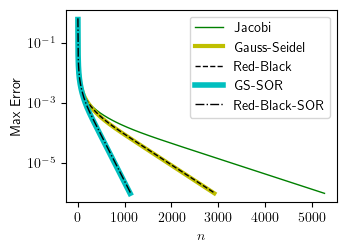

In [11]:
fig2, ax1 = plt.subplots(figsize = (3.5,2.5))
ax1.semilogy(err1, 'g-', lw = 1, label = 'Jacobi')
ax1.semilogy(err2, 'y-', lw = 3, label = 'Gauss-Seidel')
ax1.semilogy(err3, 'k--',  lw = 1, label = 'Red-Black')
ax1.semilogy(err4, 'c-', lw = 4,  label = 'GS-SOR')
ax1.semilogy(err5, 'k-.', lw = 1,  label = 'Red-Black-SOR')
ax1.set_xlabel('$n$',fontsize=10)
ax1.set_ylabel('Max Error',fontsize=10)
ax1.legend(loc= 'upper right')
plt.show()

# Poisson's Equation : $\nabla^2 \phi=f$
 
 In 2D,  $\nabla^2 \phi(x,y)= \frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2} $
 
 From the 2nd ordered central difference method
 
 $\quad\begin{align}\frac{\partial^2\phi}{\partial x^2} \approx \frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{\Delta x^2} \quad \frac{\partial^2\phi}{\partial y^2} \approx \frac{\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}}{\Delta y^2} \end{align}$
  
 since $\Delta x =\Delta y = h$(let's say)
 
 Now on solving 
 
  $\begin{align} &{\therefore} \ \nabla^2 \phi(x,y)=f(x,y) \\ &{or,} \ \frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}=f(x,y) \\ &{or,} \ \frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{h^2}+\frac{\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}}{h^2}=f_{i,j} \\ &{or,} \ \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j} }{h^2}=f_{i,j} \\ &{or,} \ \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j} =h^2f_{i,j} \\ &{or,} \ \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2f_{i,j} = 4\phi_{i,j} \\ &{or,} \ \phi_{i,j} = \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2f_{i,j}}{4} \end{align}$

In [12]:
N = 64
M = 64
h = 2/64
xc = np.linspace(-1,1,N+2)
yc = np.linspace(-1,1,M+2)
xv, yv = np.meshgrid(xc,yc)
f = np.exp(-20*(xv**2 + yv**2))
y_init = f

### Jacobi Method                                                                                                                                         
$\displaystyle{\phi_{i,j}= \frac{1}{4} [\phi_{i-1,j}+\phi_{i+1,j}+\phi_{i,j-1}+\phi_{i,j+1}+h^2f_{i,j}]}$

In [13]:
t0 = datetime.now()

y  = np.zeros([N+2,M+2])  # Boundaries at the edge
yp = y.copy()
eps = 1e-6
error = 1
error_array = [1]

while (error > eps):
    yp = y.copy()
    yp[1:N+1,1:M+1] = (y[0:N,1:M+1] +y[2:N+2,1:M+1]+ y[1:N+1,0:M] +y[1:N+1,2:M+2] - h**2*f[1:N+1,1:M+1])/4
    error = np.max(np.absolute(yp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
    y = yp.copy()
    error_array.append(error)
t1 = datetime.now()
T_J=t1-t0
err1 = np.array(error_array)
y_J = y

### Gauss-Siedel Method

In [14]:
t0 = datetime.now()

y  = np.zeros([N+2,M+2])  # Boundaries at the edge
eps = 1e-6
error = 1
error_array = [1]

while (error > eps):
    yp = y.copy()  # prev step
    for i in range(1,N+1):
        for j in range(1,M+1):
            y[i,j] = (y[i-1,j] +y[i+1,j] + y[i,j-1] +y[i,j+1]  -  h**2*f[i,j])/4
        error = np.max(np.absolute(yp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
        error_array.append(error)
t1 = datetime.now()
T_GS = t1-t0
err2 = np.array(error_array)
y_GS = y

### Red-Black Method

In [15]:
t0 = datetime.now()

y  = np.zeros([N+2,M+2])  # Boundaries at the edge
yp = y.copy()
eps = 1e-6
error = 1
error_array = [1]

while (error > eps):
    tmp  = y.copy()  # copy of y
    y[1:N:2,1:M:2] = (y[0:N-1:2,1:M:2] +y[2:N+1:2,1:M:2]+ y[1:N:2,0:M-1:2] +y[1:N:2,2:M+1:2]-  h**2*f[1:N:2,1:M:2])/4 
    y[2:N+1:2,2:M+1:2] = (y[1:N:2,2:M+1:2] +y[3:N+2:2,2:M+1:2] + y[2:N+1:2,1:M:2] +y[2:N+1:2,3:M+2:2] \
                                                 -  h**2*f[2:N+1:2,2:M+1:2])/4
    y[1:N:2,2:M+1:2] = (y[0:N-1:2,2:M+1:2] + y[2:N+1:2,2:M+1:2] + y[1:N:2,1:M:2] + y[1:N:2,3:M+2:2] \
                                                -  h**2*f[1:N:2,2:M+1:2])/4
    y[2:N+1:2,1:M:2] = (y[1:N:2,1:M:2] +y[3:N+2:2,1:M:2] + y[2:N+1:2,0:M-1:2] +y[2:N+1:2,2:M+1:2] \
                                                 -  h**2*f[2:N+1:2,1:M:2])/4
    error = np.max(np.absolute(tmp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
    error_array.append(error)
t1 = datetime.now()
T_RB = t1-t0
err3 = np.array(error_array)
y_RB = y

### SOR Method

In [16]:
t0 = datetime.now()

y  = np.zeros([N+2,M+2])  # Boundaries at the edge
yp = y.copy()
eps = 1e-6
error = 1
error_array = [1]

sor = 1.9
cnt = 1
while (error > eps):
    cnt = cnt + 1
    #yp = y.copy()  # prev step
    for i in range(1,N+1):
        for j in range(1,M+1):
            y[i,j] = (1.0-sor) * y[i,j] + sor*(y[i-1,j] + y[i+1,j] + y[i,j-1] + y[i,j+1] -  h**2*f[i,j])/4

    #error = np.max(np.absolute(yp[1:N+1,1:M+1]-y[1:N+1,1:M+1]))
    error = np.amax(abs((y[0:N,1:M+1]+y[2:N+2,1:M+1]+y[1:N+1,0:M]+y[1:N+1,2:M+2]-4*y[1:N+1,1:M+1])-h**2*f[1:N+1,1:M+1]))
    error_array.append(error)
t1 = datetime.now()
T_SOR = t1-t0
err4 = np.array(error_array)
y_S=y

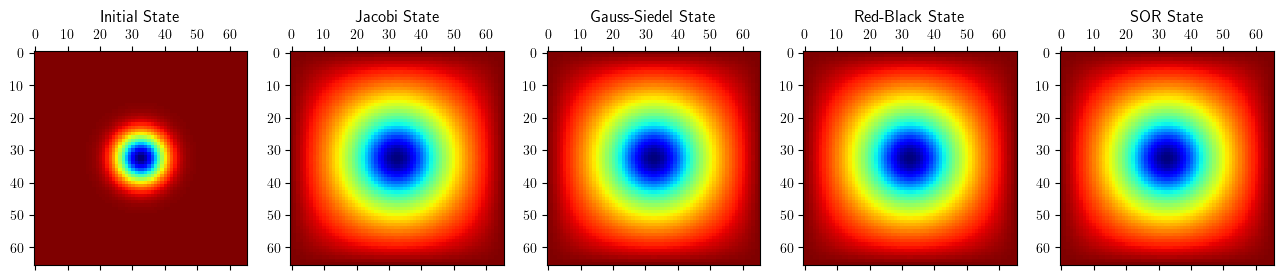

In [21]:
Y = [-y_init, y_J, y_GS, y_RB, y_S]
ty = ['Initial','Jacobi', 'Gauss-Siedel', 'Red-Black', 'SOR']

fig, ax = plt.subplots(1, len(Y), figsize = (16,3))
for i, y in enumerate(Y):
    #print(np.round(y,4),'\n')
    c = ax[i].matshow(y, cmap='jet')
    ax[i].set_aspect(aspect=1)
    divider = make_axes_locatable(ax[i])
    ax[i].set_title(ty[i]+' State')

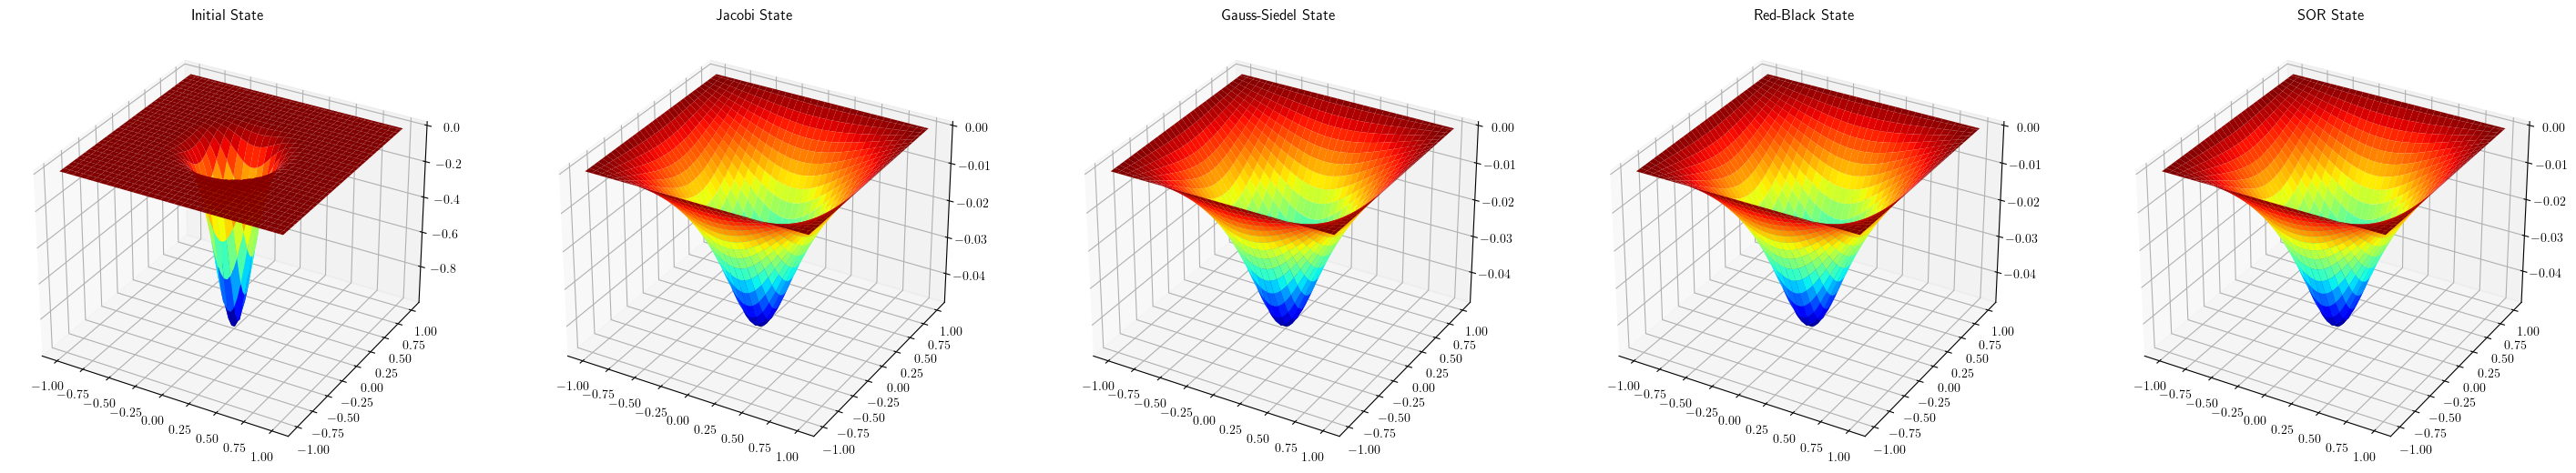

In [18]:
Y = [-y_init, y_J, y_GS, y_RB, y_S]
ty = ['Initial','Jacobi', 'Gauss-Siedel', 'Red-Black', 'SOR']

fig = plt.figure(figsize=(36,8))
gs=fig.add_gridspec(1,len(Y))
for i, y in enumerate(Y):
    ax[i]=fig.add_subplot(gs[0,i],projection='3d')
    #print(np.round(y,4),'\n')
    c = ax[i].plot_surface(xv,yv,y, cmap='jet')
    ax[i].set_title(ty[i]+' State')

In [19]:
pd.DataFrame({'Scheme':['Jacobi', 'Gauss-Siedel', 'Red-Black', 'SOR'],
              'iterations':[len(err1),len(err2),len(err3),len(err4)],
              'Time':[T_J,T_GS,T_RB, T_SOR]})

,Scheme,iterations,Time
0,Jacobi,3070,0 days 00:00:00.155909
1,Gauss-Siedel,117249,0 days 00:00:16.022513
2,Red-Black,1833,0 days 00:00:00.191444
3,SOR,119,0 days 00:00:00.931282


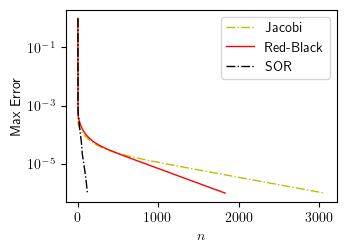

In [20]:
fig2, ax1 = plt.subplots(figsize = (3.5,2.5))
ax1.semilogy(err1, 'y-.', lw = 1, label = 'Jacobi')
#ax1.semilogy(err2, 'c--', lw = 1, label = 'Gauss-Seidel')
ax1.semilogy(err3, 'r-',  lw = 1, label = 'Red-Black')
ax1.semilogy(err4, 'k-.', lw = 1,  label = 'SOR')
ax1.set_xlabel('$n$',fontsize=10)
ax1.set_ylabel('Max Error',fontsize=10)
ax1.legend(loc= 'upper right')
plt.show()